# <center> An Introduction to Deep Learning With Python <center/>

### [3.2] Classifying movie reviews a binary classification example
Prof. Yuzo Iano

pgs: 68 - 77

#### Loading the IMDB dataset

In [1]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
train_data[0:10000:10000]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#### Preparing the data
Encoding the Integer sequences Into a binary matrix

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Building your model
The model definition

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


#### Compiling the model

In [10]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#### Configuring the optimizer

In [11]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#### Using custom losses and metrics

In [12]:
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

#### Setting aside a validation set

In [13]:
x_val = x_train[: 10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training your model

In [14]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 484us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8719
Epoch 2/20
15000/15000 [==============================] - 5s 360us/step - loss: 0.2958 - acc: 0.9045 - val_loss: 0.2991 - val_acc: 0.8909
Epoch 3/20
15000/15000 [==============================] - 8s 541us/step - loss: 0.2160 - acc: 0.9285 - val_loss: 0.3086 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 6s 384us/step - loss: 0.1741 - acc: 0.9431 - val_loss: 0.2829 - val_acc: 0.8845
Epoch 5/20
15000/15000 [==============================] - 4s 268us/step - loss: 0.1414 - acc: 0.9542 - val_loss: 0.2863 - val_acc: 0.8850
Epoch 6/20
15000/15000 [==============================] - 5s 340us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3089 - val_acc: 0.8811
Epoch 7/20
15000/15000 [==============================] - 6s 391us/step - loss: 0.0971 - acc: 0.9711 - val_loss: 0.3146 - 

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

#### Plotting the training and validation loss

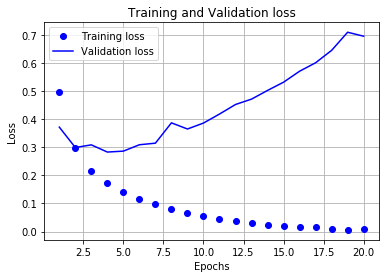

In [17]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

#### Plotting the training and validation accuracy

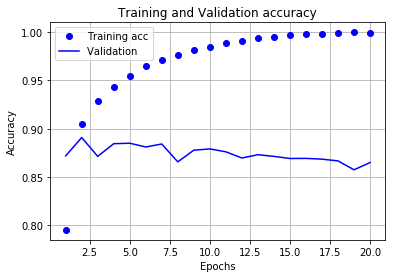

In [18]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation ')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

#### Retraining a model from scratch

In [20]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 7s 283us/step - loss: 0.4584 - acc: 0.8136
Epoch 2/4
25000/25000 [==============================] - 6s 221us/step - loss: 0.2630 - acc: 0.9093
Epoch 3/4
25000/25000 [==============================] - 4s 169us/step - loss: 0.2005 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 4s 172us/step - loss: 0.1685 - acc: 0.9389


In [21]:
results = model.evaluate(x_test, y_test)
print('Results [loss, acc] = ', results)

25000/25000 [==============================] - 8s 318us/step
Results [loss, acc] =  [0.2992388512086868, 0.88244]


#### Using a trained network to generate predictions on new data

In [22]:
model.predict(x_test)

array([[0.2116582 ],
       [0.999501  ],
       [0.9304853 ],
       ...,
       [0.14387219],
       [0.1034008 ],
       [0.70603096]], dtype=float32)

###### Pablo Minango
* pablodavid218@gmail.com 